## Classification

### EDA


**Imports**

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(style="darkgrid")


Read data and look at overview

In [164]:
FILE = 'data/class_train.csv'
df = pd.read_csv(FILE)
df.head()

,Plasma renin activity,Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article,Oxygen saturation,17α-Hydroxyprogesterone,Anti ds-DNA,Reticulocyte hemoglobin equivalent,Fibrinogen,Procalcitonin,SHBG -more detailed ranges in SHBG article,[H+],...,Luteinizing hormone (LH)-more detailed menstrual cycle ranges in separate diagram,Alpha 1-antitrypsin (AAT),Eosinophil cationic protein (ECP),Absolute content of carbon dioxide (CO2),Chloride (Cl),Amylase,IgM,Copper (Cu),Viscosity,Outcome
0,955.281824,6.008015,7.679162,8181.376094,637.176162,1655.935340,5572.232595,295.898724,8168.540684,1912.478041,...,9919.820568,4.764464,1911.290743,4.793836,7405.484356,10.522503,4644.152278,3.086409,7269.046415,0
1,1230.105982,16.004716,13.758903,10160.744348,826.173179,2005.291945,6645.645696,367.173919,9936.287732,2597.155427,...,12058.542281,21.412708,2225.412113,5.465201,8928.703718,20.770201,5900.118535,12.234226,8818.661328,0
2,1368.526126,3.397476,5.733414,11757.239383,963.221156,2309.067904,8208.582321,437.166464,11233.856279,2918.152097,...,14481.374431,5.024250,2828.177336,2.918513,10384.582517,1.224893,6798.340905,17.303987,10614.577165,0
3,1127.887803,6.128786,5.891781,9134.772017,737.518529,1859.595041,6469.579061,340.152779,9009.068421,2392.056388,...,10919.936385,1.362570,2130.646124,2.115228,8229.748093,2.486947,5371.300693,19.875223,8077.366728,0
4,1279.789838,11.834707,2.035606,10233.512908,836.776751,2064.653384,7036.941075,377.650340,10082.609454,2723.896231,...,12106.667363,13.604294,2284.807267,1.553677,9033.725105,0.833231,6061.031816,11.714379,8916.594576,0


Info shows there are no null values and no non numerical vals

In [165]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 160 columns):
 #    Column                                                                                       Non-Null Count  Dtype  
---   ------                                                                                       --------------  -----  
 0    Plasma renin activity                                                                        91 non-null     float64
 1    Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article          91 non-null     float64
 2    Oxygen saturation                                                                            91 non-null     float64
 3    17α-Hydroxyprogesterone                                                                      91 non-null     float64
 4    Anti ds-DNA                                                                                  91 non-null     float64
 5    Reticulocyte hemoglobin equiv

C:\Users\andre\AppData\Local\Temp/ipykernel_11612/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


There are no duplicates either

In [166]:
print(df[df.duplicated()]) if df[df.duplicated()].values.any() else print('No duplicates')

No duplicates


Lets look at our target column "Outcome"

We can se there is a slight imbalance and that class 1 is overrepresented in comparison to class 0. We could try to even this out as a test when we evaluate the model.

count    91.000000
mean      0.615385
std       0.489200
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Outcome, dtype: float64


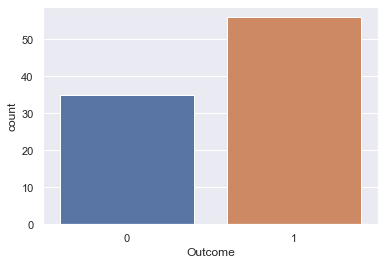

In [167]:
print(df['Outcome'].describe())
sns.countplot(x='Outcome', data=df);

c:\Kod\Skolkod\applicerad_AI\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


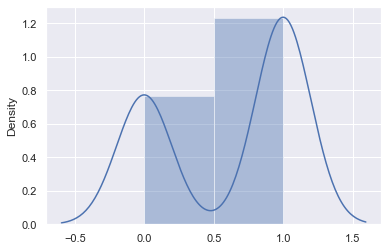

In [168]:
sns.distplot(x=df['Outcome'], bins=len(df['Outcome'].unique()));

We can see there aren't a lot of highly correlated features for Outcome

5


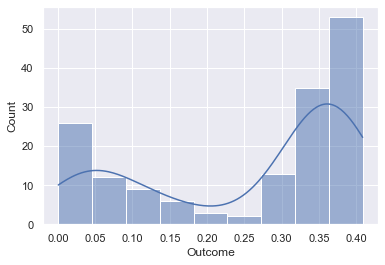

In [169]:
corr_table = abs(df.corr()['Outcome'][:-1])

sns.histplot(x=corr_table, kde=True);

Pairplot all features towards our Y val. We can see it's fairly evenly distributed, but shows some sign that higher vals tend to belong to 1 in Outcome.

c:\Kod\Skolkod\applicerad_AI\venv\lib\site-packages\seaborn\axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


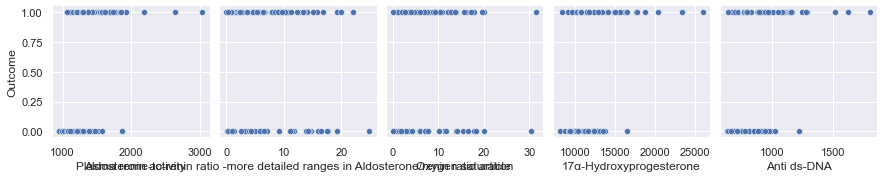

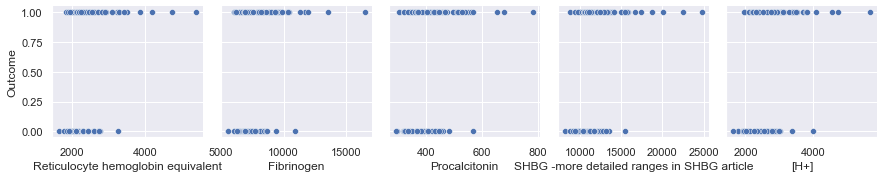

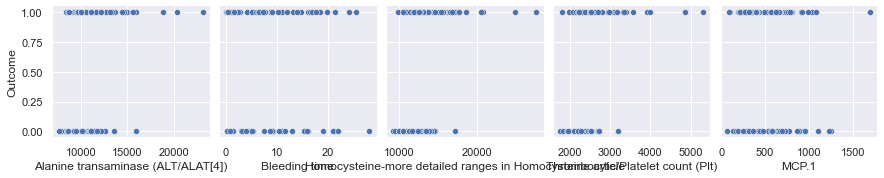

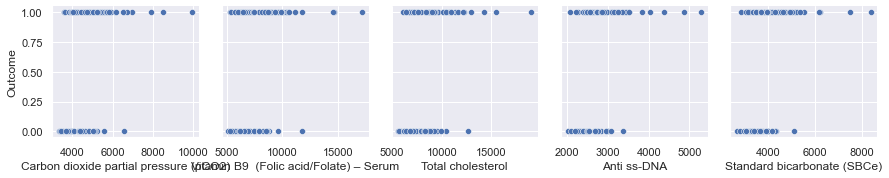

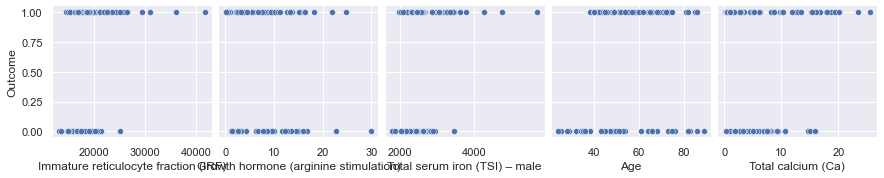

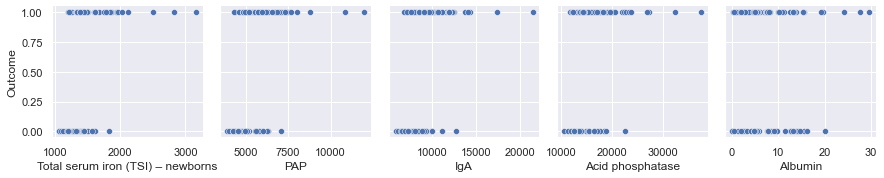

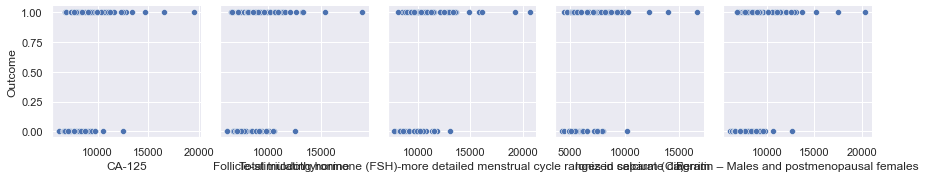

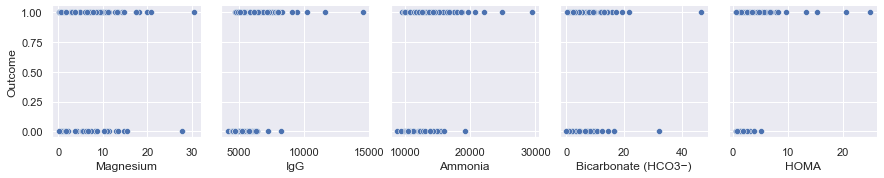

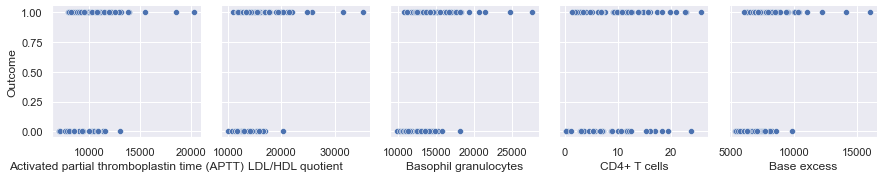

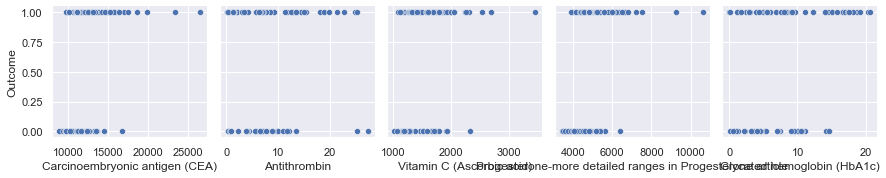

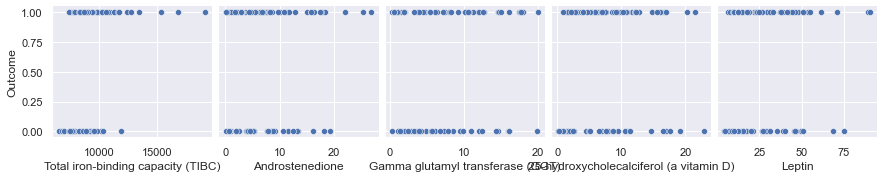

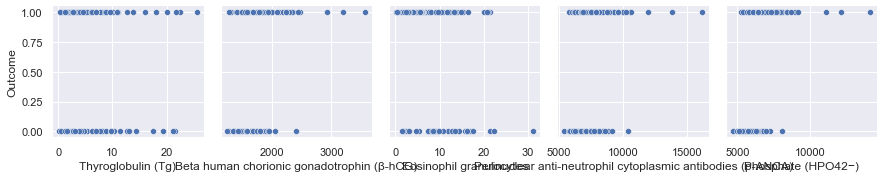

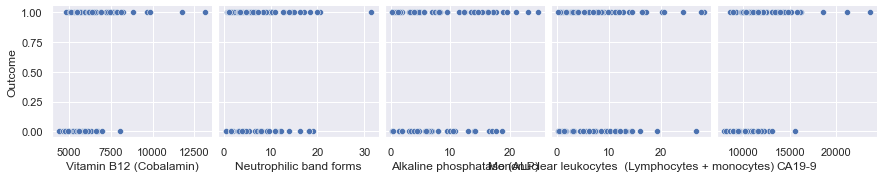

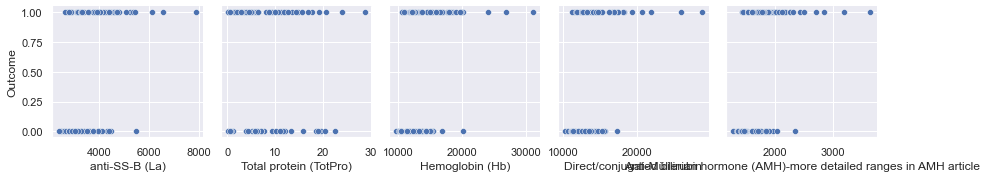

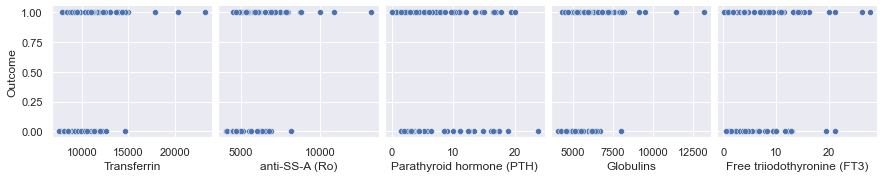

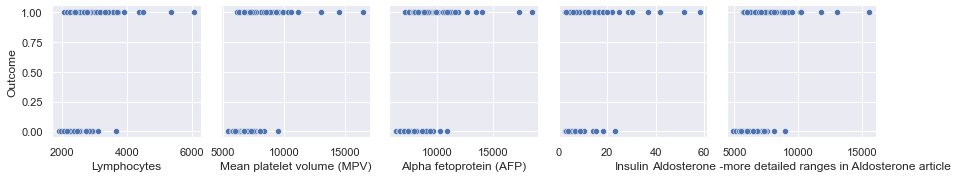

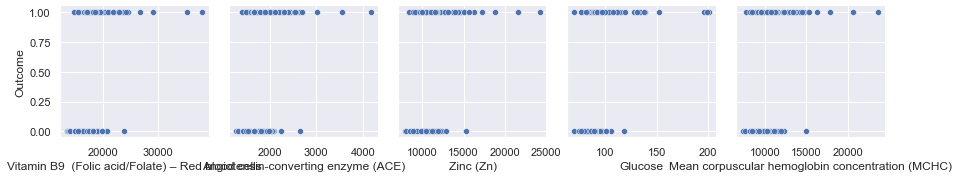

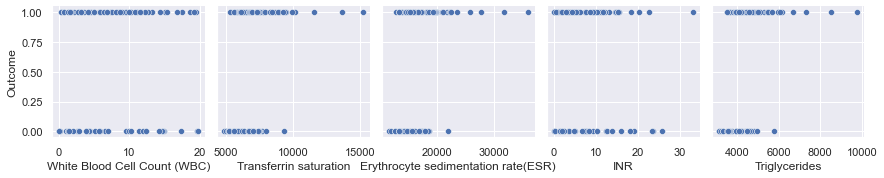

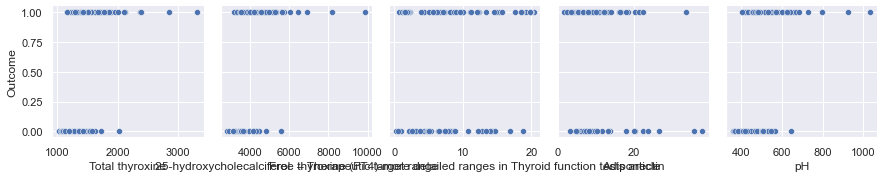

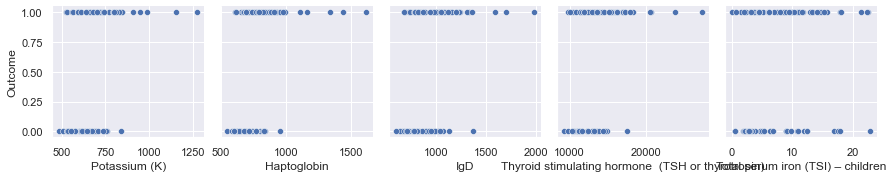

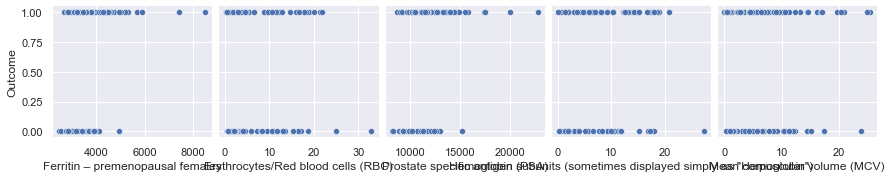

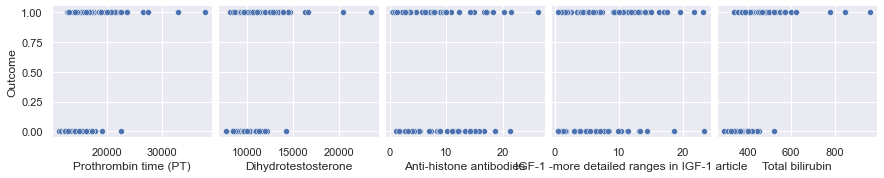

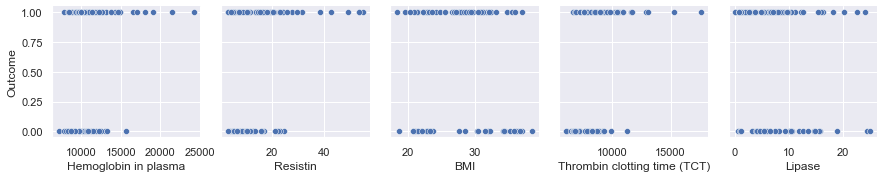

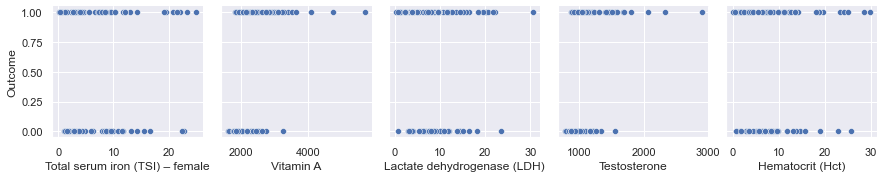

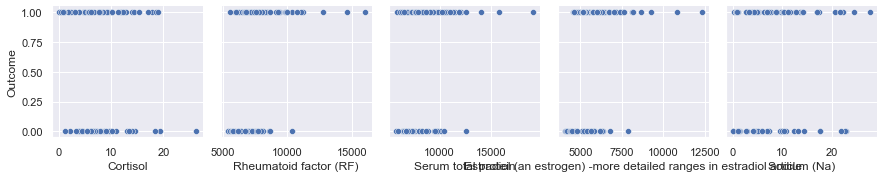

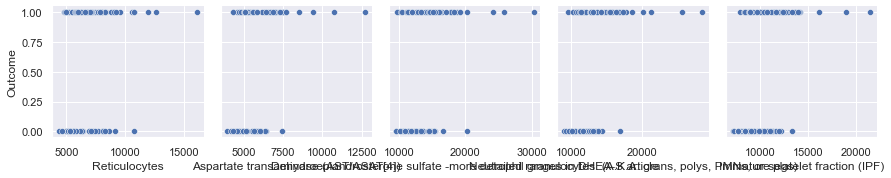

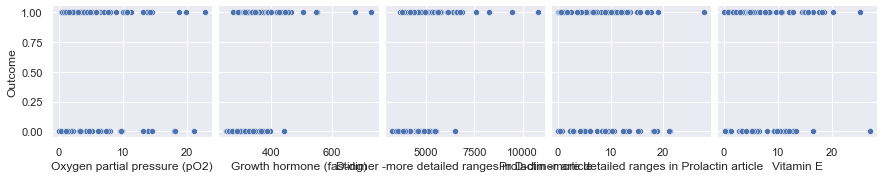

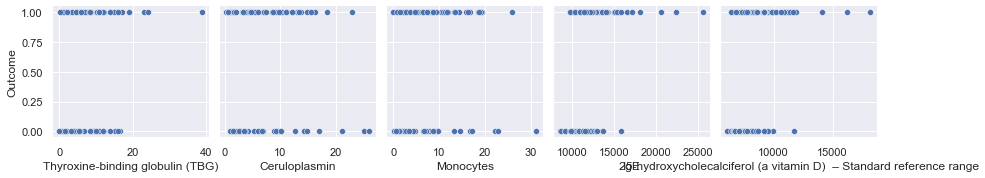

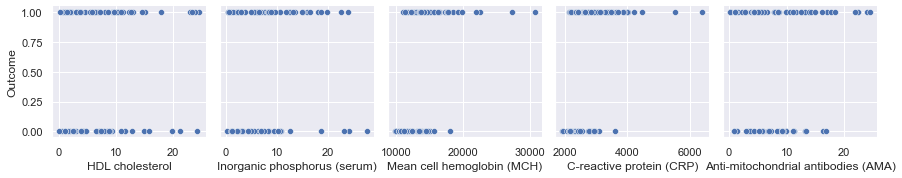

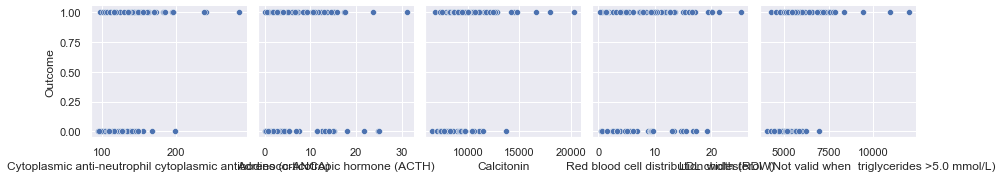

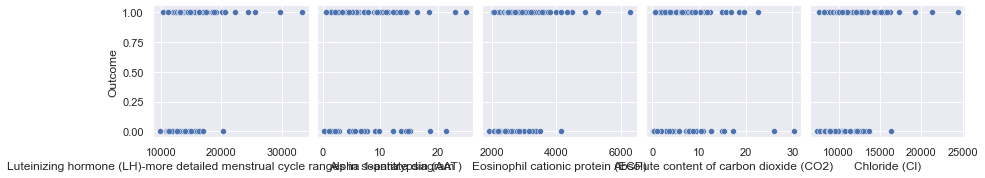

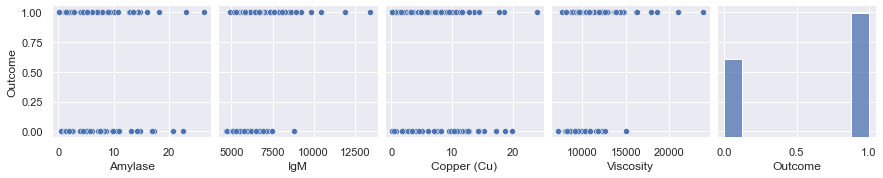

In [170]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Outcome'])

### Model selection

- XGBoost classifier (Decision Tree)
- Random Forest classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, confusion_matrix, make_scorer

# Shuffle

df = df.sample(len(df), random_state=42)
x_train, y_train = df.iloc[:, :-1], df.iloc[:, -1]

print(x_train.shape)
print(y_train.shape)

(91, 159)
(91,)


Ladda in test data

In [172]:
test_file = 'data/class_test.csv'
df_test = pd.read_csv(test_file)

df_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 160 columns):
 #    Column                                                                                       Non-Null Count  Dtype  
---   ------                                                                                       --------------  -----  
 0    Plasma renin activity                                                                        25 non-null     float64
 1    Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article          25 non-null     float64
 2    Oxygen saturation                                                                            25 non-null     float64
 3    17α-Hydroxyprogesterone                                                                      25 non-null     float64
 4    Anti ds-DNA                                                                                  25 non-null     float64
 5    Reticulocyte hemoglobin equiv

C:\Users\andre\AppData\Local\Temp/ipykernel_11612/3929765803.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_test.info(verbose=True, null_counts=True)


In [173]:
x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]

print(x_test.shape)
print(y_test.shape)

(25, 159)
(25,)


define models and fit

In [174]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
scorer = make_scorer(fbeta_score, average='weighted', beta=0.5)

In [175]:
forest_model = RandomForestClassifier(random_state=42)
xg_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

forest_model.fit(x_train, y_train)
xg_model.fit(x_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [176]:
rf_scores = cross_val_score(forest_model, x_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)
x_scores = cross_val_score(xg_model, x_train.values, y_train.values, scoring=scorer, cv=cv, n_jobs=-1)

print(f'fbeta_score Random Forest: {np.mean(rf_scores):.2f}')
print(f'fbeta_score XGBoost: {np.mean(x_scores):.2f}')

fbeta_score Random Forest: 0.76
fbeta_score XGBoost: 0.72


In [177]:
rf_pred = forest_model.predict(x_test)
x_pred = xg_model.predict(x_test.values)

Lets look at a beta range from 0 --> 2

In [178]:
rf_score = [fbeta_score(y_true=y_test, y_pred=rf_pred, average='weighted', beta=beta) for beta in np.linspace(0, 2, 21)]
xg_score = [fbeta_score(y_true=y_test, y_pred=x_pred, average='weighted', beta=beta) for beta in np.linspace(0, 2, 21)]

<AxesSubplot:>

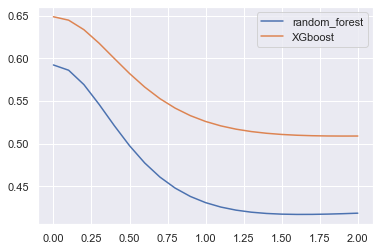

In [179]:
sns.lineplot(x=np.linspace(0, 2, 21), y=rf_score, label='random_forest')
sns.lineplot(x=np.linspace(0, 2, 21), y=xg_score, label='XGboost')

<AxesSubplot:>

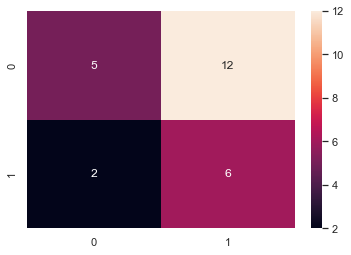

In [180]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)

<AxesSubplot:>

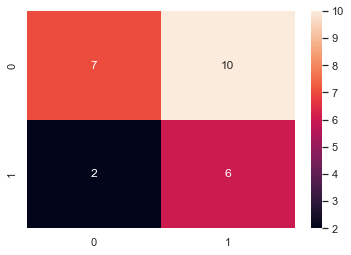

In [181]:
sns.heatmap(confusion_matrix(y_test, x_pred), annot=True)

Oversampling with SMOTE

In [182]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 56, 0: 35})
Resample dataset shape Counter({1: 56, 0: 56})


In [183]:
def fit_and_train(model, x_train: np.array, y_train: np.array, x_test: np.array, y_test: np.array, verbose=True):

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    _, ax = plt.subplots(1, 2)
    score = [fbeta_score(y_true=y_test, y_pred=y_pred, average='weighted', beta=beta) for beta in np.linspace(0, 2, 21)]
    sns.lineplot(ax=ax[0], x=np.linspace(0, 2, 21), y=score)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[1])

    [ax[i].set_title(title) for i, title in enumerate(['Fbeta_score', 'Confusion Matrix'])]
    plt.show()

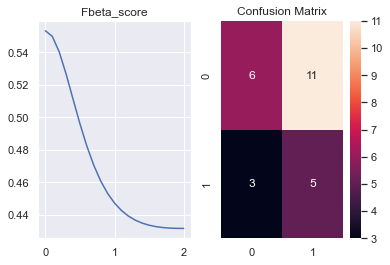

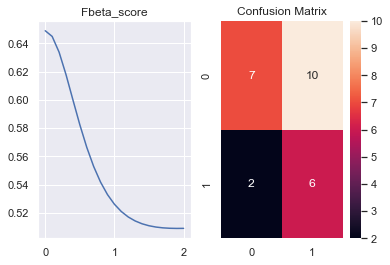

In [184]:
fit_and_train(RandomForestClassifier(random_state=42), x_smote, y_smote, x_test, y_test)
fit_and_train(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'), x_smote.values, y_smote.values, x_test, y_test)


We can see an improvement in both models when oversampling with SMOTE

### PCA

In [185]:
def plot_explained_variance(train_data: pd.DataFrame, plot_range: int = 300, sum_range: int = 10) -> None:
    '''
    Plots the explained_variance for the range of 
    Args in: train_data - data to fit PCA
             plot_range - number of principal components to include in the sum of explained variances
             sum_range - number of principal compontens explained variances to sum and print
    Returns: None
    '''
    pca = PCA(plot_range)
    pca_full = pca.fit(train_data)

    print(f'Sum of the 10 most important features:{sum(pca_full.explained_variance_ratio_[:sum_range])}')

    plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
    plt.xlabel('# of components')
    plt.ylabel('Cumulative explained variance')
    plt.title("Amount of total variance included in the principal components")
    plt.show()

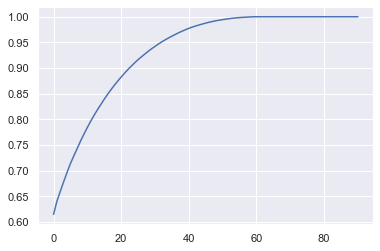

In [186]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_smote)

pca = PCA(n_components=min(x_train.shape), svd_solver='full').fit(scaled_x_train)

plt.plot(pca.explained_variance_ratio_.cumsum());

In [187]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


def run_PCA_kNN(model, X_train: pd.DataFrame, labels: pd.DataFrame) -> None:
    '''
    PCA and kNN classifier. Lowers the dimensionality of the input data and performs kNN for a grid searched range
    specified by neighbours and components. If n_components is not passed, performs standard kNN.
    Args in: 
    X_train - dataframe of feature vectors
    labels - dataframe of labels
    n_components - number of principal components to use
    neighbours - list of values for the k neighbours used
    components - list of components to use from the PCA
    Returns:
    None
    '''
    n_components = min(X_train.shape)
    components = [i for i in range(1, min(X_train.shape), 5)]

    pca = PCA(n_components=n_components)
    print(f'Shape of data before PCA transform using {n_components} components:  {X_train.shape}')
    X_train = pca.fit_transform(X_train)
    print(f'Shape of data after PCA transform using {n_components} components:  {X_train.shape}')
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train, labels, test_size=0.2, random_state=42)
    scores = []

    for i, component in enumerate(components):
        model.fit(X_train_pca[:,:component], y_train_pca)
        y_pred = model.predict(X_test_pca[:, :component])
        score_beta = [(fbeta_score(y_true=y_test_pca, y_pred=y_pred, average='weighted', beta=beta), beta) for beta in np.linspace(0, 2, 21)]
        max_score, beta = sorted(score_beta, key=lambda x: x[0], reverse=True)[0]
        scores.append(max_score)
        print(f'nr_components = {component}, Score = {max_score} with beta {beta}')
    print(len(scores))
    
    return scores

In [188]:
xx_score = run_PCA_kNN(XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='auc'), x_smote, y_smote)
rff_score = run_PCA_kNN(RandomForestClassifier(random_state=False), x_smote, y_smote)


Shape of data before PCA transform using 112 components:  (112, 159)
Shape of data after PCA transform using 112 components:  (112, 112)
nr_components = 1, Score = 0.7408026755852843 with beta 0.0
nr_components = 6, Score = 0.8247491638795986 with beta 0.0
nr_components = 11, Score = 0.7845849802371541 with beta 0.0
nr_components = 16, Score = 0.8488612836438925 with beta 0.0
nr_components = 21, Score = 0.7845849802371541 with beta 0.0
nr_components = 26, Score = 0.8036890645586297 with beta 0.0
nr_components = 31, Score = 0.7665551839464882 with beta 0.0
nr_components = 36, Score = 0.8488612836438925 with beta 0.0
nr_components = 41, Score = 0.8247491638795986 with beta 0.0
nr_components = 46, Score = 0.8247491638795986 with beta 0.0
nr_components = 51, Score = 0.8036890645586297 with beta 0.0
nr_components = 56, Score = 0.8247491638795986 with beta 0.0
nr_components = 61, Score = 0.7845849802371541 with beta 0.0
nr_components = 66, Score = 0.8036890645586297 with beta 0.0
nr_componen

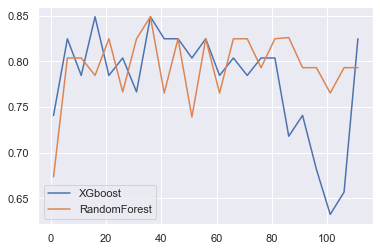

In [189]:
sns.lineplot(y=xx_score, x=[i for i in range(1, min(x_smote.shape), 5)], label='XGboost');
sns.lineplot(y=rff_score, x=[i for i in range(1, min(x_smote.shape), 5)], label='RandomForest');

<AxesSubplot:>

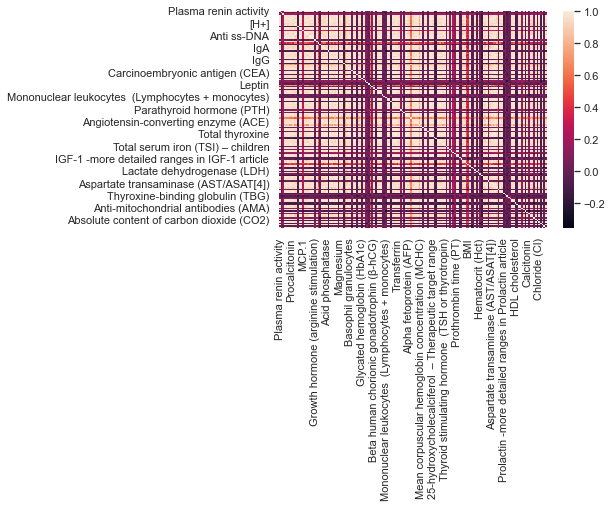

In [190]:
sns.heatmap(df.iloc[:, :-1].corr())

### Feature selection

In [191]:
from sklearn.feature_selection import RFE

rf_model = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='auc')
rfe = RFE(rf_model, n_features_to_select=60)
rfe = rfe.fit(x_smote, y_smote)


<AxesSubplot:>

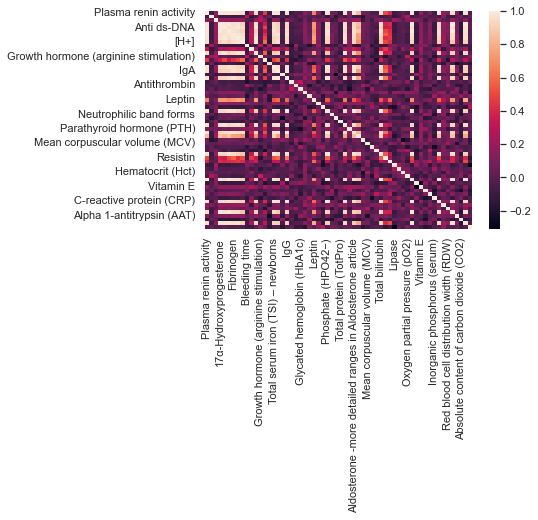

In [192]:
cols = x_smote.columns[rfe.support_]
x_train_stripped = x_smote[cols]
x_test_stripped = x_test[cols]

sns.heatmap(x_train_stripped.corr())

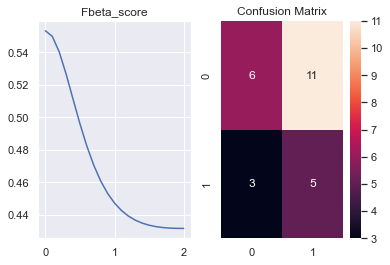

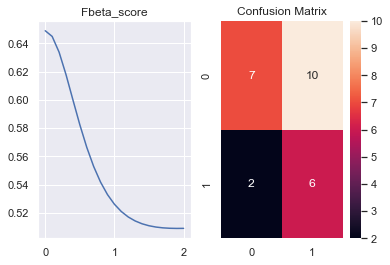

In [193]:
fit_and_train(RandomForestClassifier(random_state=42), x_train_stripped, y_smote, x_test_stripped, y_test)
fit_and_train(XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='auc'), x_train_stripped.values, y_smote.values, x_test_stripped.values, y_test)

Maximera Fβ-score f ̈or β = 0.5,1,2 f ̈or minoritetsklassen. Ni ska allts ̊a g ̈ora
separata approacher f ̈or alla dessa fall.
Anv ̈and tv ̊a olika, valfria klassificeringsalgoritmer och j ̈amf ̈or resultaten fr ̊an
dessa

In [194]:
from sklearn.svm import SVC

s_model = SVC(kernel='linear', random_state=42)
xg_model = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='auc')
rf_model = RandomForestClassifier(random_state=42)

BETA_GOALS = [0.5, 1, 2]

# See which models shows good tendencies process this data.
scorers = [make_scorer(fbeta_score, average='weighted', beta=beta) for beta in BETA_GOALS]

xg_scores = [cross_val_score(xg_model, x_train_stripped.values, y_smote.values, scoring=sc, n_jobs=-1) for sc in scorers]
print('done xg')
rf_scores = [cross_val_score(rf_model, x_train_stripped, y_smote, scoring=sc, n_jobs=-1) for sc in scorers]
print('done forest')
s_scores = [cross_val_score(s_model, x_train_stripped, y_smote, scoring=sc, n_jobs=-1) for sc in scorers]
print('done svm')

done xg
done forest
done svm


0.7403883266598358
0.8576588339582991
0.8302701890712243


<AxesSubplot:>

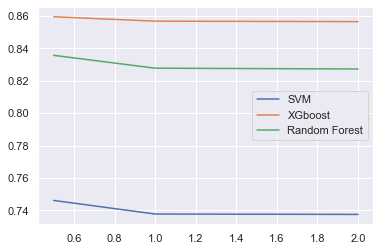

In [195]:
model_scores = [s_scores, xg_scores, rf_scores]
names = ['SVM', 'XGboost', 'Random Forest']
for score in model_scores:
    print(np.mean(score))

sns.lineplot(x=(0.5, 1, 2), y=[np.mean(score) for score in s_scores], label='SVM')
sns.lineplot(x=(0.5, 1, 2), y=[np.mean(score) for score in xg_scores], label='XGboost')
sns.lineplot(x=(0.5, 1, 2), y=[np.mean(score) for score in rf_scores], label='Random Forest')

GridSearch beta 0.5

In [196]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 200, 400],
    'min_samples_leaf': [3, 6, 10, 20],
    'n_estimators': [50, 100, 300, 800]
}

scorers = {f'Beta_{beta}': make_scorer(fbeta_score, average='weighted', beta=beta) for beta in BETA_GOALS}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=1, scoring=scorers, refit=False, return_train_score=True)

In [197]:
grid_search.fit(x_train_stripped, y_smote)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 50, 200, 400],
                         'min_samples_leaf': [3, 6, 10, 20],
                         'n_estimators': [50, 100, 300, 800]},
             refit=False, return_train_score=True,
             scoring={'Beta_0.5': make_scorer(fbeta_score, average=weighted, beta=0.5),
                      'Beta_1': make_scorer(fbeta_score, average=weighted, beta=1),
                      'Beta_2': make_scorer(fbeta_score, average=weighted, beta=2)},
             verbose=1)

In [198]:
results = grid_search.cv_results_

In [199]:
results

{'mean_fit_time': array([0.14580283, 0.330796  , 0.86400518, 2.55560169, 0.13419909,
        0.39540434, 0.88080492, 2.32640209, 0.12460437, 0.29999967,
        0.74500127, 2.25160069, 0.12580047, 0.25299845, 0.90520358,
        2.2306025 , 0.13920174, 0.28260236, 0.88820338, 2.40220275,
        0.15960259, 0.30339909, 0.9236032 , 2.44300346, 0.16199856,
        0.3027966 , 0.9256032 , 2.42959962, 0.16340046, 0.31259747,
        0.93839884, 2.46260123, 0.17460279, 0.33440552, 1.04220362,
        2.59779434, 0.16920156, 0.33419785, 0.99599881, 2.65339932,
        0.16840334, 0.32699485, 1.00179734, 2.67300081, 0.17119746,
        0.34119835, 1.00639997, 2.62239633, 0.17919598, 0.33600192,
        1.05040264, 2.76500058, 0.16780128, 0.34139409, 1.02959943,
        2.76219788, 0.18020124, 0.34239821, 1.00999866, 2.82459683,
        0.17519884, 0.32659936, 1.0635993 , 2.51758785]),
 'std_fit_time': array([0.02019825, 0.06106061, 0.15582623, 0.40006907, 0.00961838,
        0.06404528, 0.127

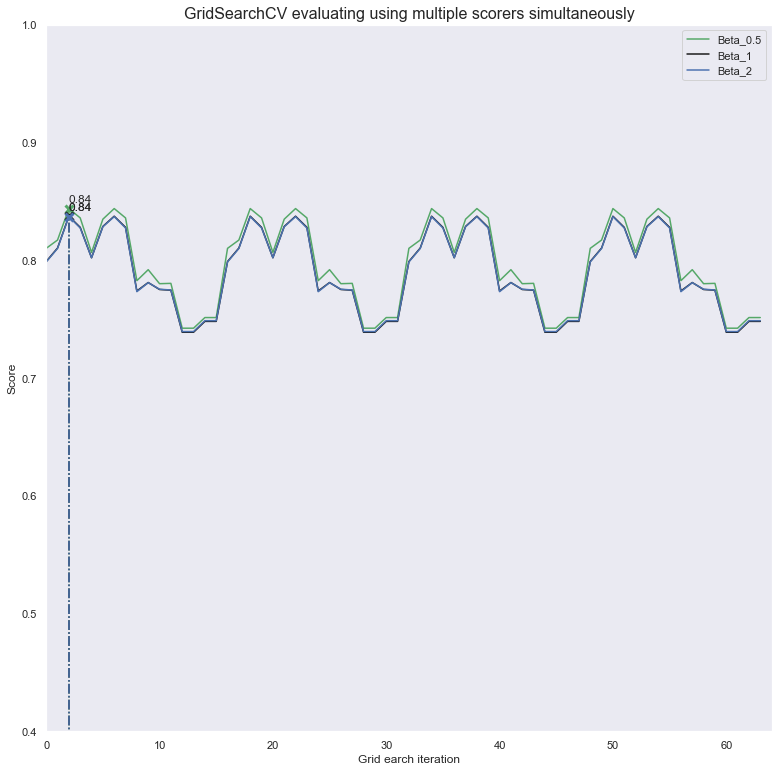

In [200]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Grid earch iteration")
plt.ylabel("Score")

ax = plt.gca()
ax.set_ylim(0.4, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_leaf"].data, dtype=float)
X_axis = [i for i in range(len(X_axis))]
ax.set_xlim(0, len(X_axis))

for scorer, color in zip(scorers.keys(), ["g", "k", 'b']):
    sample_score_mean = results["mean_test_%s" % (scorer)]

    ax.plot(
        X_axis,
        sample_score_mean,
        color=color,
        label="%s" % (scorer),
    )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [201]:
best_idxs = [np.nonzero(results[f"rank_test_Beta_{beta_val}"] == 1)[0][0] for beta_val in BETA_GOALS]

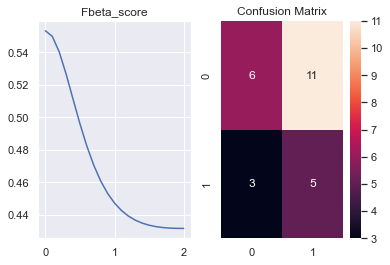

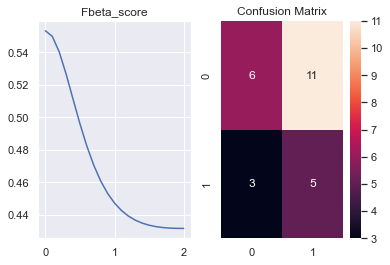

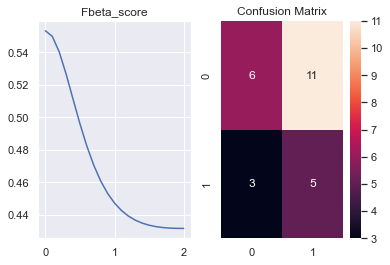

[None, None, None]

In [202]:
rf_models = [RandomForestClassifier(random_state=42, **results['params'][idx]) for idx in best_idxs]

[fit_and_train(model, x_train_stripped, y_smote, x_test_stripped, y_test) for model in rf_models]


In [203]:
param_grid = {'gamma': [0, 0.2, 0.8, 3.2],
              'max_depth': [5,10],
              'n_estimators': [5,10, 50],
              'reg_alpha': [0.1, 0.8, 6.4],
              'reg_lambda': [0.1, 0.8, 6.4]}
              
xg_model = XGBClassifier(use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=1, scoring=scorers, refit=False, return_train_score=True)

In [114]:
grid_search.fit(x_train_stripped.values, y_smote.values)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
             param_grid={'gamma': [0, 0.2, 0.8, 3.2], 'max_depth': [5, 10],
                         'n_estimators': [5, 10, 50],
                         'reg_alpha': [0.1, 0.8, 6.4],
                         'reg_lambda': [0.1, 0.8, 6.4]},
             refit=False, return_train_sco

In [115]:
results = grid_search.cv_results_

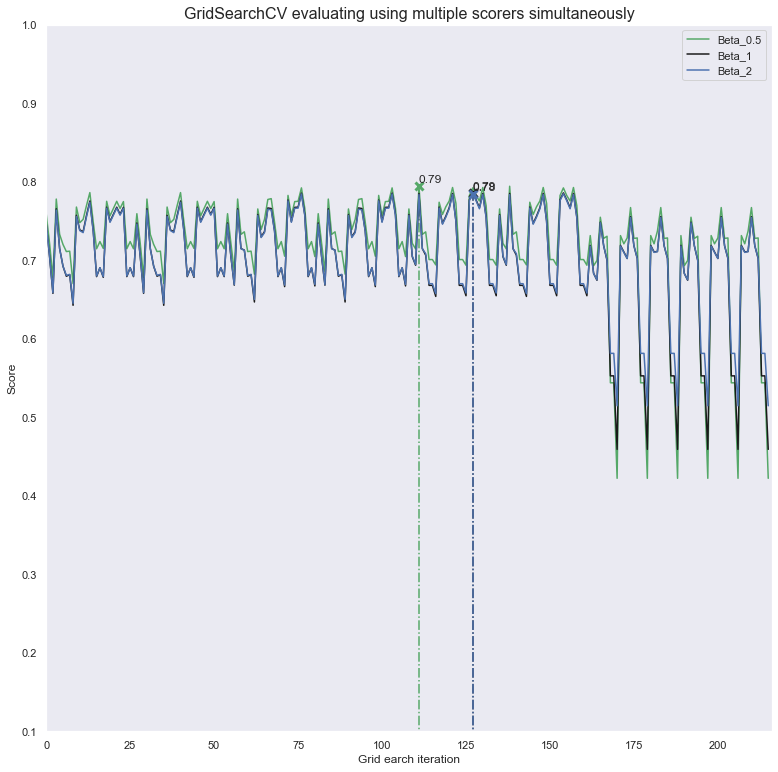

In [117]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Grid earch iteration")
plt.ylabel("Score")

ax = plt.gca()
ax.set_ylim(0.1, 1)

# Get the regular numpy array from the MaskedArray
X_axis = [i for i in range(216)]
ax.set_xlim(0, len(X_axis))

for scorer, color in zip(scorers.keys(), ["g", "k", 'b']):
    sample_score_mean = results["mean_test_%s" % (scorer)]

    ax.plot(
        X_axis,
        sample_score_mean,
        color=color,
        label="%s" % (scorer),
    )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

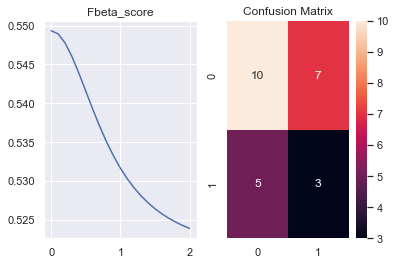

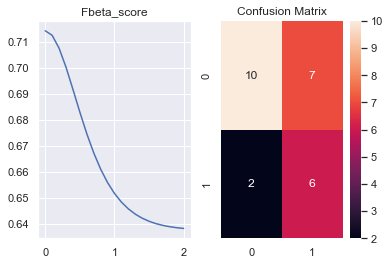

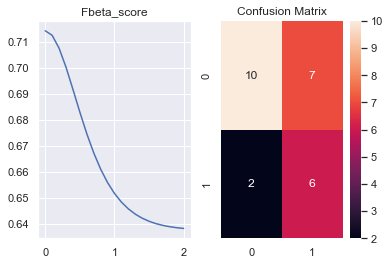

[None, None, None]

In [118]:
best_idxs = [np.nonzero(results[f"rank_test_Beta_{beta_val}"] == 1)[0][0] for beta_val in BETA_GOALS]
rf_models = [XGBClassifier(random_state=42, **results['params'][idx], use_label_encoder=False, eval_metric='auc') for idx in best_idxs]

[fit_and_train(model, x_train_stripped.values, y_smote.values, x_test_stripped.values, y_test.values) for model in rf_models]

Seems it's difficult to achieve a decent score with this train / test set. Lets try:

- Merge and shuffle data so it's not sorted by outcome
- Make new train  / test split based on shuffled data
- new smote eval

In [234]:
a = cols.to_list()
a.append('Outcome')

df_test = pd.read_csv('data/class_test.csv', usecols=a)
df_train = pd.read_csv('data/class_train.csv', usecols=a)

df = pd.concat([df_test, df_train])
df = df.sample(len(df), random_state=42)

X, Y = df.iloc[:, :-1], df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=33)

print(y_train.value_counts())

smote = SMOTE()

# fit predictor and target variable
x_train, y_train = smote.fit_resample(x_train, y_train)

1    50
0    33
Name: Outcome, dtype: int64


In [235]:
param_grid = {'gamma': [0, 0.2, 0.8, 3.2],
              'max_depth': [5,10],
              'n_estimators': [5,10, 50],
              'reg_alpha': [0.1, 0.8, 6.4],
              'reg_lambda': [0.1, 0.8, 6.4]}
              
xg_model = XGBClassifier(use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=1, scoring=scorers, refit=False, return_train_score=True)

In [236]:
grid_search.fit(x_train.values, y_train.values)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
             param_grid={'gamma': [0, 0.2, 0.8, 3.2], 'max_depth': [5, 10],
                         'n_estimators': [5, 10, 50],
                         'reg_alpha': [0.1, 0.8, 6.4],
                         'reg_lambda': [0.1, 0.8, 6.4]},
             refit=False, return_train_sco

In [237]:
results = grid_search.cv_results_

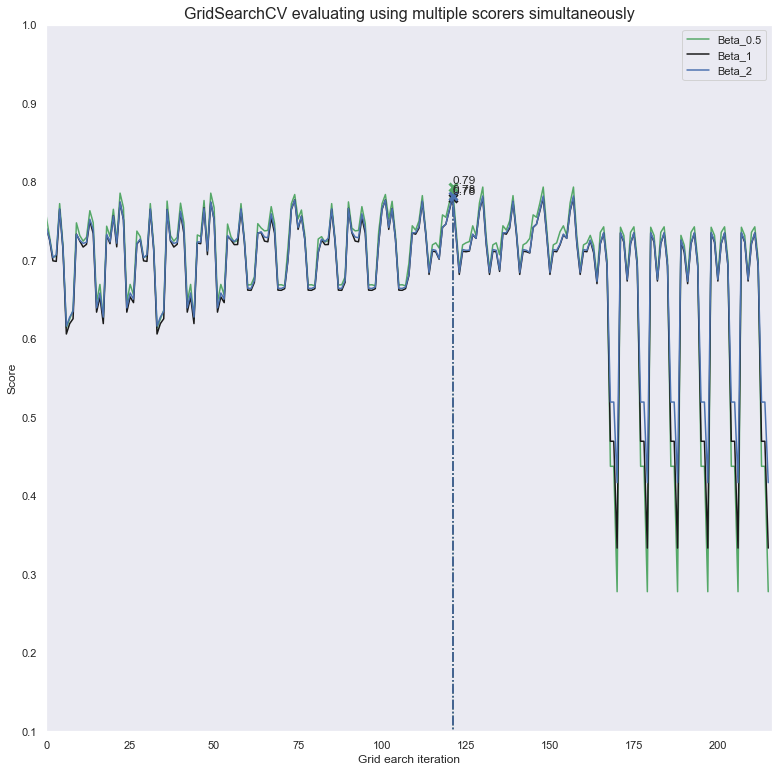

In [238]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Grid earch iteration")
plt.ylabel("Score")

ax = plt.gca()
ax.set_ylim(0.1, 1)

# Get the regular numpy array from the MaskedArray
X_axis = [i for i in range(216)]
ax.set_xlim(0, len(X_axis))

for scorer, color in zip(scorers.keys(), ["g", "k", 'b']):
    sample_score_mean = results["mean_test_%s" % (scorer)]

    ax.plot(
        X_axis,
        sample_score_mean,
        color=color,
        label="%s" % (scorer),
    )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

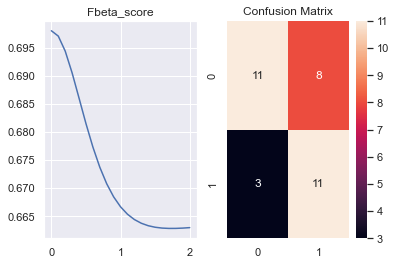

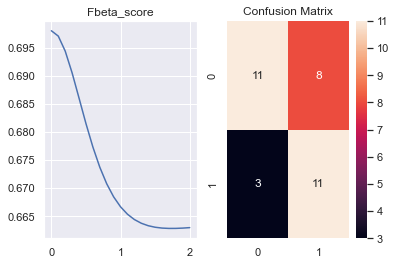

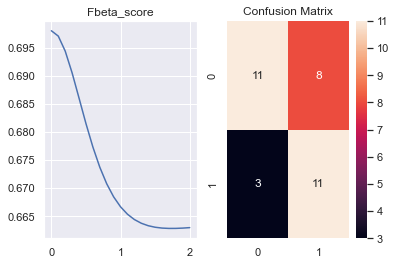

[None, None, None]

In [239]:
best_idxs = [np.nonzero(results[f"rank_test_Beta_{beta_val}"] == 1)[0][0] for beta_val in BETA_GOALS]
rf_models = [XGBClassifier(random_state=42, **results['params'][idx], use_label_encoder=False, eval_metric='auc') for idx in best_idxs]

[fit_and_train(model, x_train.values, y_train.values, x_test.values, y_test.values) for model in rf_models]

Better result